# Actividad 4 - Métodos de aprendizaje no supervisado

Cindy Johanna Zapata Romero

# Crear un Dataset Simulado 
Utilicé datos similares a los del sistema de transporte masivo de la actividad 3, pero ahora enfocándonos en un análisis no supervisado.

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [53]:
# Fijamos la semilla para reproducibilidad
np.random.seed(42)

# Creamos el dataset simulado
data = {
    'origen': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F'], 200),
    'destino': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F'], 200),
    'tiempo_viaje': np.random.randint(5, 60, size=200),  # Tiempo de viaje en minutos
    'num_pasajeros': np.random.randint(10, 300, size=200),  # Número de pasajeros
    'clima': np.random.choice(['soleado', 'lluvioso', 'nublado'], 200)
}

# Convertimos el diccionario a un DataFrame
df = pd.DataFrame(data)

# Imprimimos el dataset generado
print("Dataset simulado:")
print(df.head(10))  # Imprimimos las primeras 10 filas del dataset

Dataset simulado:
  origen destino  tiempo_viaje  num_pasajeros     clima
0      D       A            11            160  lluvioso
1      E       D            40            199  lluvioso
2      C       A            49            233  lluvioso
3      E       F            24             46  lluvioso
4      E       A             5            277  lluvioso
5      B       B            12            192  lluvioso
6      C       D            50             22   nublado
7      C       D            20            288   nublado
8      C       F            18            226   nublado
9      E       B            16            295   nublado


Realizamos un escalado de los datos

In [55]:
# Escalamos las características numéricas para que K-Means funcione correctamente
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Método del codo para seleccionar el número óptimo de clusters

C:\Users\ojito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ojito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

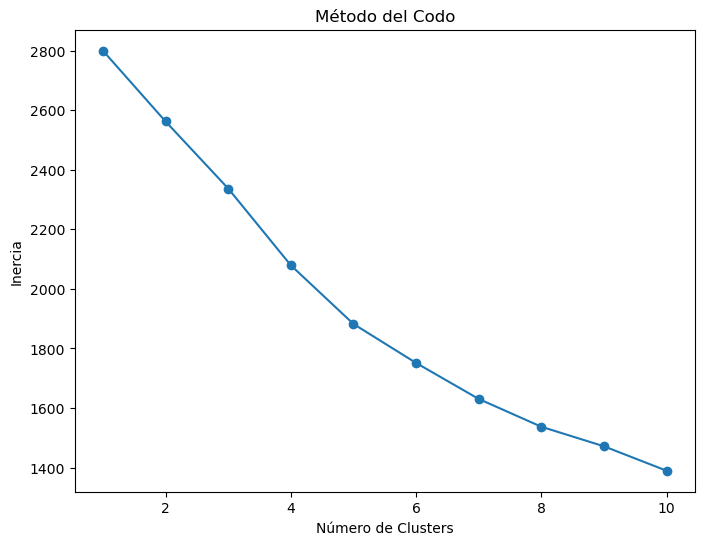

In [67]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Creamos una lista para almacenar las inercias de cada valor de k
inertia = []

# Calculamos la inercia para valores de k entre 1 y 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Agregamos n_init=10 para suprimir la advertencia
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

## Módelo 1: K-Means Clustering

In [63]:
# Aplicamos K-Means con el número óptimo de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init=10 suprime la advertencia
df['cluster'] = kmeans.fit_predict(scaled_data)
# Mostramos las primeras filas del DataFrame con los clusters asignados
print(df.head())

C:\Users\ojito\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  origen destino  tiempo_viaje  num_pasajeros     clima  cluster
0      D       A            11            160  lluvioso        0
1      E       D            40            199  lluvioso        2
2      C       A            49            233  lluvioso        0
3      E       F            24             46  lluvioso        2
4      E       A             5            277  lluvioso        2


# Gracias